<a href="https://colab.research.google.com/github/gharis/Machine-Learning/blob/master/Breast_Cancer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 4.3MB 43.6MB/s 
     |████████████████████████████████| 501kB 47.3MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print (tf.__version__)

2.0.0-rc0


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = datasets.load_breast_cancer()

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [11]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = cancer.target

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
x.shape

(569, 30)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [20]:
x_train.shape

(455, 30)

In [19]:
x_test.shape

(114, 30)

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [0]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

In [0]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size = 2, activation = 'relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))


In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test), verbose =1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 2s 3ms/sample - loss: 1.2867 - accuracy: 0.4791 - val_loss: 0.6837 - val_accuracy: 0.6667
Epoch 2/50
455/455 [==============================] - 0s 376us/sample - loss: 0.9335 - accuracy: 0.6088 - val_loss: 0.6306 - val_accuracy: 0.8070
Epoch 3/50
455/455 [==============================] - 0s 378us/sample - loss: 0.7583 - accuracy: 0.6703 - val_loss: 0.5785 - val_accuracy: 0.8684
Epoch 4/50
455/455 [==============================] - 0s 400us/sample - loss: 0.5683 - accuracy: 0.7253 - val_loss: 0.5301 - val_accuracy: 0.8596
Epoch 5/50
455/455 [==============================] - 0s 350us/sample - loss: 0.4437 - accuracy: 0.8352 - val_loss: 0.4884 - val_accuracy: 0.8596
Epoch 6/50
455/455 [==============================] - 0s 369us/sample - loss: 0.4098 - accuracy: 0.8220 - val_loss: 0.4486 - val_accuracy: 0.8596
Epoch 7/50
455/455 [==============================] - 0s 338us/sample - loss: 0.

In [54]:
history.history

{'accuracy': [0.47912088,
  0.60879123,
  0.6703297,
  0.72527474,
  0.83516484,
  0.82197803,
  0.83296704,
  0.8659341,
  0.85274726,
  0.8945055,
  0.8791209,
  0.9054945,
  0.9054945,
  0.93186814,
  0.8901099,
  0.9252747,
  0.9142857,
  0.9032967,
  0.92967033,
  0.92747253,
  0.9098901,
  0.9252747,
  0.9252747,
  0.94505495,
  0.93626374,
  0.93186814,
  0.93186814,
  0.94725275,
  0.94065934,
  0.9076923,
  0.93846154,
  0.94505495,
  0.93846154,
  0.94725275,
  0.93626374,
  0.94505495,
  0.93846154,
  0.93406594,
  0.96263736,
  0.94945055,
  0.95824176,
  0.95384616,
  0.95164835,
  0.95384616,
  0.95384616,
  0.96043956,
  0.96043956,
  0.94725275,
  0.94505495,
  0.95384616],
 'loss': [1.2866798446073637,
  0.9335381718127282,
  0.7582529349641486,
  0.568260526231357,
  0.4436717673972413,
  0.4097678521177271,
  0.4019065767854125,
  0.3712843910350904,
  0.3441268083485928,
  0.28990059301748383,
  0.30399774411222436,
  0.2323761963254803,
  0.25154668603624614,
  0.1

In [0]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  #plot Accuracy
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

  #plot loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model loss')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

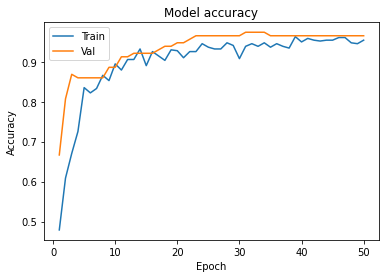

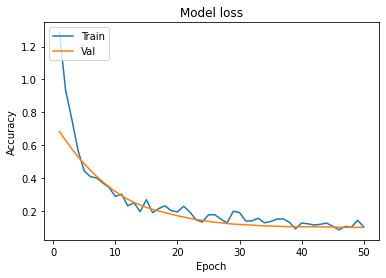

In [56]:
plot_learningCurve(history, epochs)